# Wednesday, February 25th, 2026

Last week, we worked on documenting our code, learned how to use modules, and how to use the `zip` function.

In [85]:
def y(t, y0, v0=0, g=-9.8):
    return g/2*t**2 + v0*t + y0

Given this function, it would be nice if we had a way to visualize the paths taken by objects in freefall. This leads us to...

## Plotting in Python

We will the `pyplot` submodule from the `matplotlib` module for our plotting needs. When importing modules (or submodules), we can assign our own short-hand name using the syntax `import <some module or submodule> as <some short-hand name>`.

Typically, we will import the `matplotlib.pyplot` module and assign it the short-hand name `plt`.

In [86]:
import matplotlib.pyplot as plt

In [88]:
#help(plt)

The `pyplot` module has **many** for data visualization and plotting. The most basic is the `plot` function.

In [90]:
#help(plt.plot)

The `plot` function is extremely flexible in how it can be called (by making use of default arguments and keyword arguments). One of the most basic ways to use the `plot` function is to enter a list of $x$-values and a list of $y$-values as inputs. That is, `plt.plot(<list of x-values>, <list of y-values>)`.

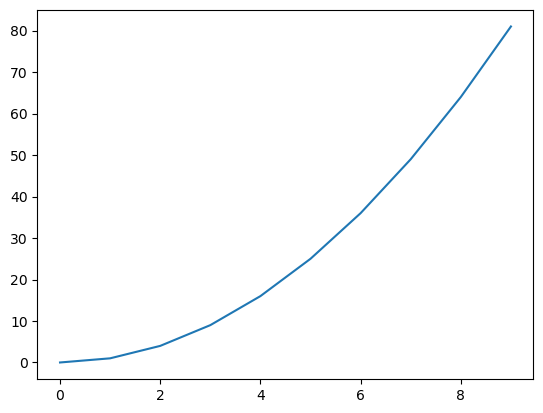

In [93]:
x_list = [ i for i in range(10) ]
y_list = [ x**2 for x in x_list ]

plt.plot(x_list, y_list)

**Exercise:** Use the function `y` defined previously to plot the height over time of an object dropped (from rest) from a height of $1,000$ meters (on Earth) for the range $0 \leq t \leq 16$.

We can call `plt.plot` several times within a cell to plot several pieces of data.

**Exercise:** Replicate the previous plot, then add another curve that shows the height over time of the same object dropped on Mars, where the acceleration due to gravity is approximately $-3.71\, m/s^2$.

### Options when calling `plt.plot`

By default, the `plot` function will connect the supplied data points with a polygonal line, with the color selected automatically. We can include additional keyword arguments to change this behavior. 

#### Changing the color

For example, the keyword argument `color` can be used to manually set the color. There are many color characters available:
 - `'r'`: red
 - `'g'`: green
 - `'b'`: blue
 - `'k'`: black
 - `'m'`: magenta
 - `'c'`: cyan
 - `'y'`: yellow
 - `'C0'`, `'C1'`, ... `'C9'`: a sequence of colors that `pyplot` automatically uses when no color is supplied

We can also supply certain color names (see [Matplotlib documentation](https://matplotlib.org/stable/gallery/color/named_colors.html)), or an RGB triple of integers (we will discuss this later in the course).

**Exercise:** Replicate the previous plot, then modify the code so that the path of the object on Earth is plotted in blue and the path of the object on Mars is plotted in red.

#### Changing the marker style

The keyword argument `marker` can be used to change the marker style. Here are some of the available styles:
 - `'.'`: point
 - `','`: pixel
 - `'o'`: circle
 - `'^'`: triangle
 - `'*'`: star
 - `'s'`: square
 - `'+'`: plus
 - `'x'`: x

More can be found in the [Matplotlib documentation](https://matplotlib.org/stable/api/markers_api.html).

**Exercise:** Replicate the previous plot, then modify the code so that the Earth path uses triangle markers and the Mars path uses square markers.

#### Changing the line style

The keyword argument `linestyle` can be used to change the line style. Here are some of the available styles:
 - `'-'` or `'solid'`: solid line
 - `'--'` or `'dashed'`: dashed line
 - `':'` or `'dotted'`: dotted line
 - `'-.'` or `'dashdot`': alternating dots and dashes
 - `''` or `'None'`: no line

More can be found in the [Matplotlib documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

**Exercise:** Replicate the previous plot, then modify the code so that the Earth path uses a dashed line and the Mars path uses a dotted line.

#### Using the `fmt` string short-hand

When calling `plt.plot`, we can include a string after our $x$- and $y$-values with color, marker, and line configuration options. For example, the calling `plt.plot(x_list, y_list, 'r*--')` tells `plt.plot` to plot in red with stars for markers and dashed lines. 

**Exercise:** Replicate the previous plot using the `fmt` string instead of the `color`, `marker`, and `linestyle` keyword arguments.

### Labeling plots

When graphing data, we should (almost) always include:
 - A title, which can be added using the `title` function.
 - Axis labels, which can be added using the `xlabel` and `ylabel` functions.
   
When plotting several curves in a single figure, we should also label the curves and include a legend.
When calling the `plot` function, we can use the `label` keyword argument to give a label to the data being plotted.
We can then use the `legend` function to add a legend to the figure.

Note: Titles and labels can include LaTeX.

**Exercise:** Replicate the previous plot and add appropriate labels.

### Further tweaks: axis limits, grid lines

We can use `plt.grid()` to add grid lines to the interior of the plot.

We can change the horizontal and vertical limits using the `plt.xlim` and `plt.ylim` function. 

**Exercise:** Modify the horizontal and vertical limits to approximate how long it takes for the object to hit the ground (i.e. reach $y(t)=0$) on Earth.

Suppose that we want to evaluate the function $y(t)$ on a more densely-packed list of $t$-values. Can we come up with a formulaic method for constructing such a list of $t$-values to be plugged in?

## NumPy

The NumPy (*Num*erical *Py*thon) module contains many useful tools for numerical calculations in Python. We typically import the module and assign the name `np`.

In [1]:
import numpy as np

The basic building blocks in NumPy are *arrays*, which in many ways behave like lists. We can use the `np.array` function to convert a list to an array.

In [ ]:
my_array = np.array([0,1,2,3,4,5,6])
my_array

Just like with lists, we can acccess elements of an array by index using square brackets:

We can also use slicing to access parts of an array, similar to lists.

Unlike lists, NumPy arrays are built to perform arithmetic operations on an element-by-element basis. For example, compare what happens when we multiply a list by an integer and what happens when we multiply an array by an integer.

In a similar way:

 - Adding/subtracting/multiplying/dividing an array by an integer/float adds/subtracts/multiplies/divides each element by the integer/float.
 - Exponentiating/modular dividing an array by an integer/float is performed on each element.
 - If we have two arrays of the same shape, we can add/subtract/multiply/divide/exponentiate/modular divide one by the other. The operation will be performed element-by-element (that is, the first elements from each array will be added/subtracted/multiplied/etc., the second elements from each array will be...).

Let's return to the earlier exercise of plotting $y(t)$ using a densely-packed list (or array) of . The `np.linspace` function can be used to easliy generate an array of evenly spaced points over some interval. The basic syntax

> `np.linspace(a,b,N)` 

generates an array of $N$ evenly spaced points over the interval $[a, b]$.

In [2]:
#help(np.linspace)

**Exercise:** Use NumPy and `plt.plot` to plot the previously described trajectories of objects in freefall on Earth and Mars.

## [Project 2: Pythagorean triples](https://jllottes.github.io/Projects/pythagorean_triples/pythagorean_triples.html)

The second project deals with exploring triples of integers known as *Pythagorean triples* (see [project page](https://jllottes.github.io/Projects/pythagorean_triples/pythagorean_triples.html) for details). We already have all of the Python tools necessary to find and explore these triples, and we will continue discussing using Matplotlib to visualize them.

One of the first tasks that we will need to tackle is to identify when we have a Pythagorean triple. To do so, it will be helpful if we can identify whether or not a given integer $n$ is a perfect square. That is, we want to determine if $n = m^2$ for some integer $m$.

**Exercise:** Write a function `is_square` that takes in an integer `n` and returns `True` if `n` is a perfect square and `False` otherwise.

**Exercise:** Write a function `is_ptriple` that takes in a triple of integers $(a,b,c)$ and returns `True` if the triple is a Pythagorean triple, and `False` otherwise.